In [1]:
import warnings
warnings.simplefilter("ignore")

%matplotlib inline


import math

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt


import matplotlib
import matplotlib.pyplot as plt


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, SelectPercentile

from sklearn.feature_selection import chi2, f_classif
from sklearn.decomposition import PCA
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

import xgboost

from sklearn.naive_bayes import GaussianNB
from scipy import stats

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectFromModel, VarianceThreshold, SelectKBest, f_classif, chi2
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Imputer, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.pipeline import Pipeline
from scipy import stats
from sklearn.externals import joblib

from math import sqrt

In [2]:
import seaborn as sns

In [3]:
data = pd.read_csv('dataset.csv').drop('Unnamed: 0', axis = 1)
#data

In [4]:
ss = data.iloc[:, 0]
le = preprocessing.LabelEncoder()
n=le.fit(data.iloc[:, 0])
ss= le.transform(ss)

eye = pd.DataFrame(ss, columns = ['Eye'])
data = data.drop('Study eye', axis = 1)
data = pd.concat([data, eye], axis = 1)
#data

In [5]:
se = data.iloc[:, 0].fillna('M')
le_sex = preprocessing.LabelEncoder()
le_sex.fit(data.iloc[:, 0].fillna('M'))
se= le_sex.transform(se)

sex = pd.DataFrame(se, columns = ['sex'])
data = data.drop('Sex', axis = 1)
data = pd.concat([data, sex], axis = 1)
#data

In [60]:
for item in list(data.columns):
    print(item)

Age (years)
VA (log)
 Contrast Sensitivity(Log)
Number of fix points
Number of sacs
Mean fix duration
Mean sac duration
Mean Amplitude
Mean Peak Velocity
Number of fix points per DadsArmy
Number of sacs pers DadsArmy
Mean fix duration per DadsArmy
Mean sac duration per DadsArmy
Mean Amplitude per DadsArmy
Mean Peak Velocity per DadsArmy
Number of fix points per HistoryBoys
Number of sacs pers HistoryBoys
Mean fix duration per HistoryBoys
Mean sac duration per HistoryBoys
Mean Amplitude per HistoryBoys
Mean Peak Velocity per HistoryBoys
Number of fix points per SkiCross
Number of sacs pers SkiCross
Mean fix duration per SkiCross
Mean sac duration per SkiCross
Mean Amplitude per SkiCross
Mean Peak Velocity per SkiCross
Fixatoin Trajectory Length
Target
Eye
sex


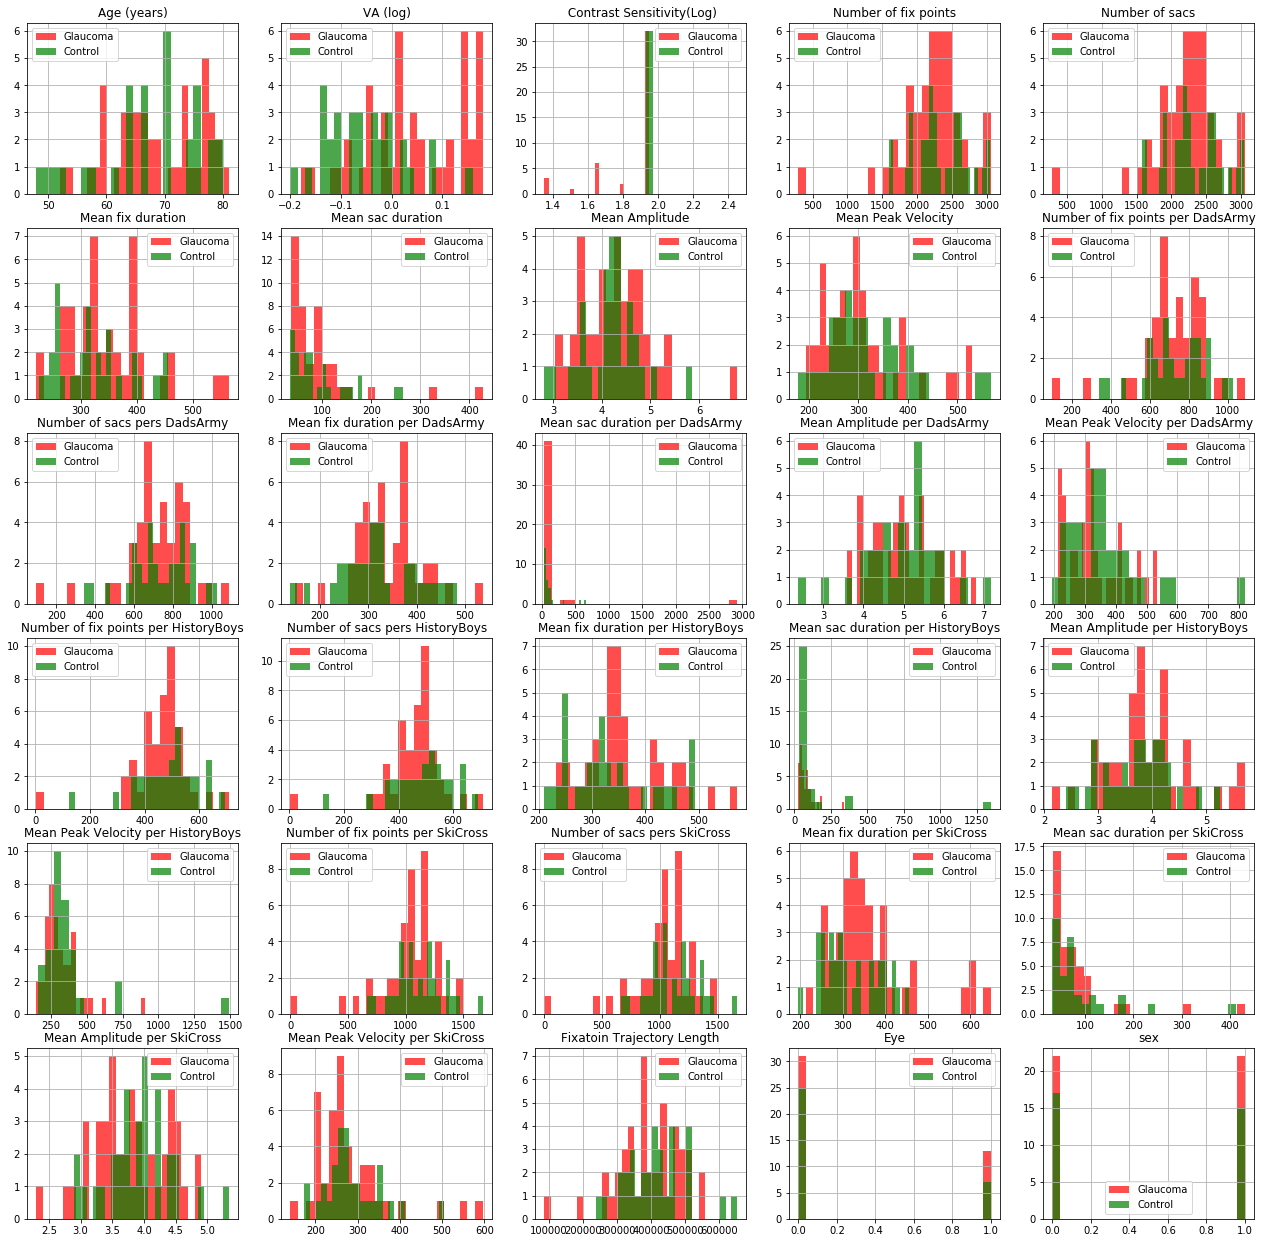

In [77]:
plt.figure(figsize = (22,22))
i = 1
colors = ['red', 'green']
for item in list(data.columns):
    if item != 'Target':
        plt.subplot(6,5,i)
        i += 1
        plt.hist(data[item][data['Target'] == 1], color = colors[0], bins = 25, label = 'Glaucoma', alpha = 0.7)
        plt.hist(data[item][data['Target'] == 0], color = colors[1], bins = 25, label = 'Control', alpha = 0.7)
        plt.title(item)
        plt.grid(True)
        plt.legend()
#plt.savefig('feature_distr.png', bbox_inches='tight', dpi =200)
plt.show()

In [6]:
y = data['Target']
data = data.drop(['Target'], axis = 1)

data_median = data
data_median = data_median.fillna(data_median.median())

In [7]:
#data_median

In [8]:
def MyGridSearchClf (X, y, acc, n_features, n_components):
    random_state = 32
    
    app = []
    #dict1 = None
    #dict2 = None
    #dict3 = None
    # list of Regression methods
    classification_models = []
    classification_models += [RandomForestClassifier(random_state=random_state)]
    classification_models += [svm.SVC(random_state=random_state, probability = True)]
    classification_models += [KNeighborsClassifier()]
    classification_models += [LogisticRegression()]
    classification_models += [xgboost.XGBClassifier()]
    classification_models += [GaussianNB()]
    
    #RFC
     
    
    #SVC
    svc_gamma = [1e-3, 1e-4]
    svc_C = [0.1,0.5,0.6, 0.7, 1, 10, 20]
    
    #KNC
    knc_n_neighbors =  [1, 2, 3, 5, 10, 15, 20]
    knc_algorithm = ['auto', 'ball_tree', 'kd_tree']
    
    #LR
    
    #XGB
    
    #NB
#    var_smoothing = [1у-09]
    
    # list of dimensionality reduction methods
    dim_reduction_methods = []
    dim_reduction_methods += [None]
    #dim_reduction_methods += [SelectKBest(stats.ttest_ind)]
    dim_reduction_methods += [SelectKBest(f_classif)]
    dim_reduction_methods += [SelectPercentile(score_func = f_classif)]
    dim_reduction_methods += [PCA(random_state=random_state)]
    dim_reduction_methods += [LocallyLinearEmbedding(random_state=random_state)]

    scores = []
    paras = []
    estim = []
    stds = []
    CVS = []
    for clf_model in classification_models:
        #print(str(clf_model.__class__.__name__))
        score = []
        para = []
        feature = []
        est = []
        std = []
        CV = []
        for red_method in dim_reduction_methods:
            #print(str(red_method.__class__.__name__))
            param_grid = {}
            
            pipe = Pipeline([
            ('StdScaler', StandardScaler()),
            ("VarTh", VarianceThreshold()),
            ('dim_reduction', red_method),
            ('classifier', clf_model),
            ])
            
            if red_method == None:
                pipe = Pipeline([
                ('StdScaler', StandardScaler()),
                ("VarTh", VarianceThreshold()),
                ('classifier', clf_model),
                ])
                
            if red_method == dim_reduction_methods[1]: #or red_method == dim_reduction_methods[2]:# or red_method == dim_reduction_methods[3]:
                param_grid = {
                    'dim_reduction__k': n_features,
                    }
                
            if red_method == dim_reduction_methods[2]:# or red_method == dim_reduction_methods[5]:
                param_grid = {
                    'dim_reduction__percentile': n_features,
                    }
            
            if  red_method == dim_reduction_methods[3] or red_method == dim_reduction_methods[4]:
                param_grid = {
                    'dim_reduction__n_components': n_components,
                    }
            
            #if clf_model == classification_models[0]:
                #print('Performing RFC')
                #param_grid['classifier__n_estimators'] = rfc_n_estimators
                #param_grid['classifier__max_features'] = rfc_max_features
                #param_grid['classifier__min_samples_split'] = rfc_min_samples_split
                #param_grid['classifier__criterion'] = rfc_criterion
            
            if clf_model == classification_models[1]:
                #print('Performing SVC')
                param_grid['classifier__gamma'] = svc_gamma
                param_grid['classifier__C'] = svc_C
                
            if clf_model == classification_models[2]:
                #print('Performing KNR')
                param_grid['classifier__n_neighbors'] = knc_n_neighbors
                param_grid['classifier__algorithm'] = knc_algorithm
            '''
                
            if clf_model == classification_models[]:
                print('Performing LR')
                param_grid['classifier__C'] = lr_C
                param_grid['classifier__solver'] = lr_solver
            
                
            if clf_model == classification_models[3]:
                #print('Performing XGB')
                param_grid['classifier__max_depth'] = xgb_max_depth
            
            if clf_model == classification_models[4]:
                #print('Performing SVR')
                param_grid['classifier__C'] = svr_C
                #param_grid['classifier__kernel'] = svr_kernel
            '''
    #kfold = KFold(y.size, shuffle=True, n_folds=10, random_state = 32)
            CV_clf = GridSearchCV(estimator = pipe, param_grid = param_grid, cv = 3, scoring = acc)
        
        
            
            
            CV_clf.fit(X, y)
            #print ("Model best params:", CV_clf.best_params_)
            #clf_params=CV_clf.best_params_
    #with open('out.txt', 'w') as f:
    #print ('Model best estimator:', CV_clf.best_estimator_,) #file=f)
            #print ('Model best score:', CV_clf.best_score_ )
        
        
            #required for visualisation functions
            y_pred = CV_clf.predict(X)
            y_prob = CV_clf.predict_proba(X)[:,1]
            print('Metrics for {} with {} dimention reduction technique'.format(str(clf_model.__class__.__name__),str(red_method.__class__.__name__ )))
            result_report(y, y_pred, y_prob, '{}_{}.png'.format(str(clf_model.__class__.__name__),str(red_method.__class__.__name__ )))
            
            
            
            
            
            score.append(np.abs(CV_clf.best_score_))
            std.append(CV_clf.cv_results_['std_test_score'][CV_clf.best_index_])
            para.append(CV_clf.best_params_)
            est.append(CV_clf.best_estimator_)
            CV.append(CV_clf)
            #feature.append(CV_clf.best_estimator_.named_steps['regressor'].coef_)
            #app.append(CV_clf.cv_results_ )
        scores.append(score)
        paras.append(para)
        estim.append(est)
        stds.append(std)
        CVS.append(CV)
    head = ['None', 'SelectKBest(f_classif)', 'SelectPercentile(f_classif)' ,'PCA', 'LLE' ]
    ix = ['RFC', 'SVC', 'KNC', 'LR', 'XGB', 'NB']
    #print(scores)
    #print(pd.DataFrame(scores,  columns = head, index = ix))
    return 0

In [9]:
n_features = [1, 3, 5, 10, 15, 20, 25, 30, ]
n_components = [1, 3, 5, 10, 15, 20, 25, 30, ]

Metrics for RandomForestClassifier with NoneType dimention reduction technique
              precision    recall  f1-score   support

    Glaucoma       0.94      1.00      0.97        32
     Control       1.00      0.95      0.98        44

   micro avg       0.97      0.97      0.97        76
   macro avg       0.97      0.98      0.97        76
weighted avg       0.98      0.97      0.97        76



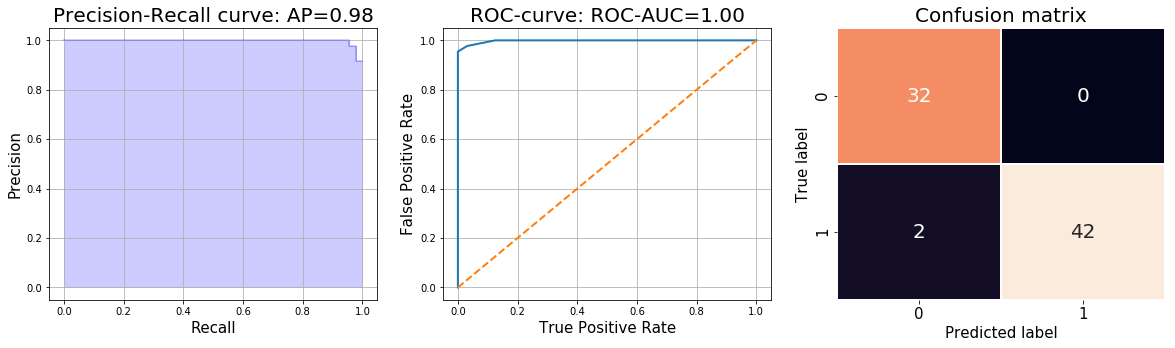

Metrics for RandomForestClassifier with SelectKBest dimention reduction technique
              precision    recall  f1-score   support

    Glaucoma       0.94      0.97      0.95        32
     Control       0.98      0.95      0.97        44

   micro avg       0.96      0.96      0.96        76
   macro avg       0.96      0.96      0.96        76
weighted avg       0.96      0.96      0.96        76



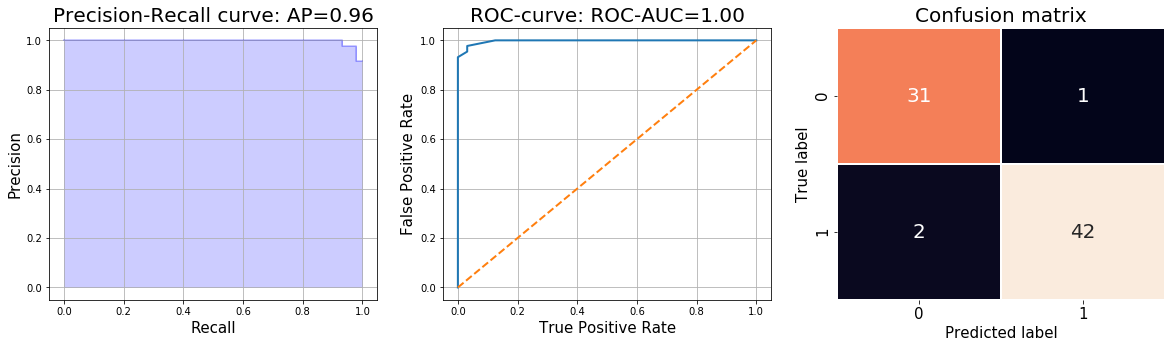

Metrics for RandomForestClassifier with SelectPercentile dimention reduction technique
              precision    recall  f1-score   support

    Glaucoma       1.00      0.97      0.98        32
     Control       0.98      1.00      0.99        44

   micro avg       0.99      0.99      0.99        76
   macro avg       0.99      0.98      0.99        76
weighted avg       0.99      0.99      0.99        76



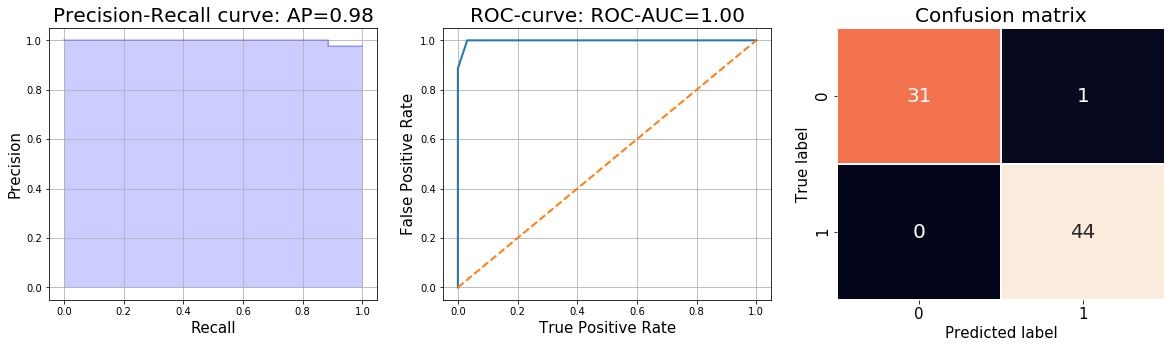

Metrics for RandomForestClassifier with PCA dimention reduction technique
              precision    recall  f1-score   support

    Glaucoma       1.00      1.00      1.00        32
     Control       1.00      1.00      1.00        44

   micro avg       1.00      1.00      1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



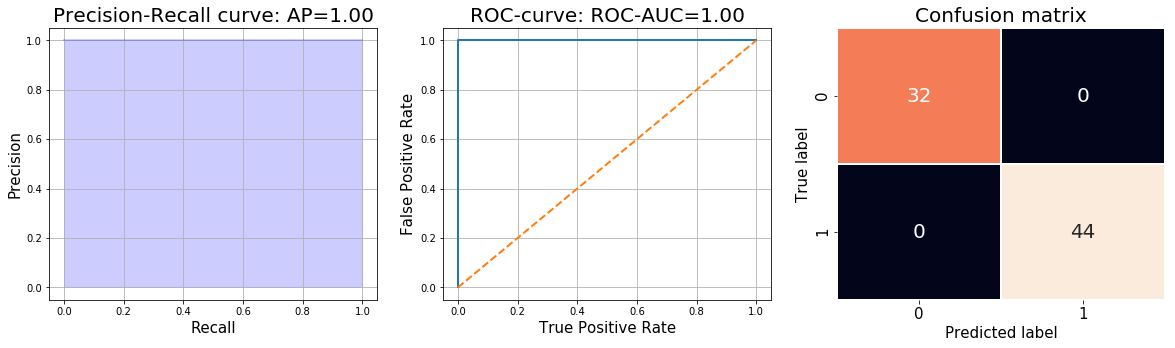

Metrics for RandomForestClassifier with LocallyLinearEmbedding dimention reduction technique
              precision    recall  f1-score   support

    Glaucoma       0.94      0.97      0.95        32
     Control       0.98      0.95      0.97        44

   micro avg       0.96      0.96      0.96        76
   macro avg       0.96      0.96      0.96        76
weighted avg       0.96      0.96      0.96        76



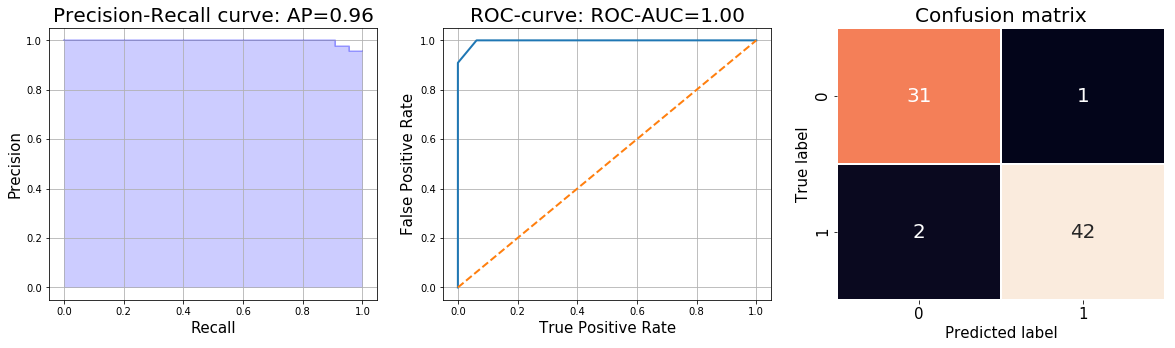

Metrics for SVC with NoneType dimention reduction technique
              precision    recall  f1-score   support

    Glaucoma       0.78      0.66      0.71        32
     Control       0.78      0.86      0.82        44

   micro avg       0.78      0.78      0.78        76
   macro avg       0.78      0.76      0.76        76
weighted avg       0.78      0.78      0.77        76



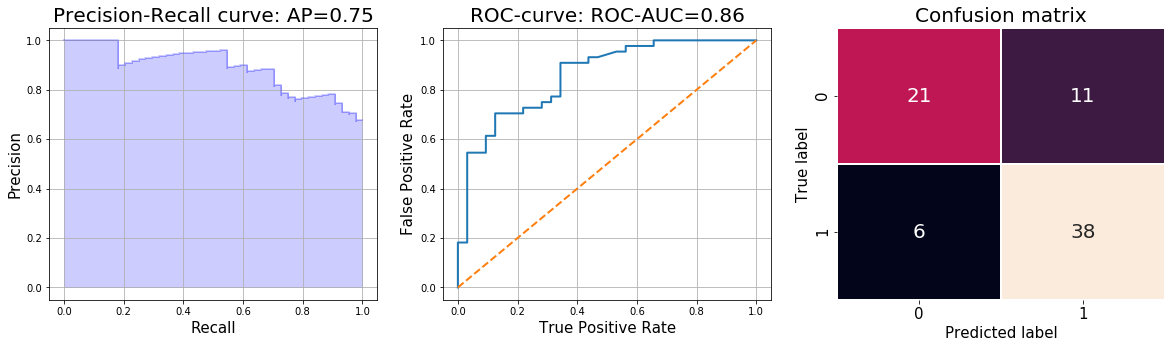

Metrics for SVC with SelectKBest dimention reduction technique
              precision    recall  f1-score   support

    Glaucoma       0.66      0.78      0.71        32
     Control       0.82      0.70      0.76        44

   micro avg       0.74      0.74      0.74        76
   macro avg       0.74      0.74      0.74        76
weighted avg       0.75      0.74      0.74        76



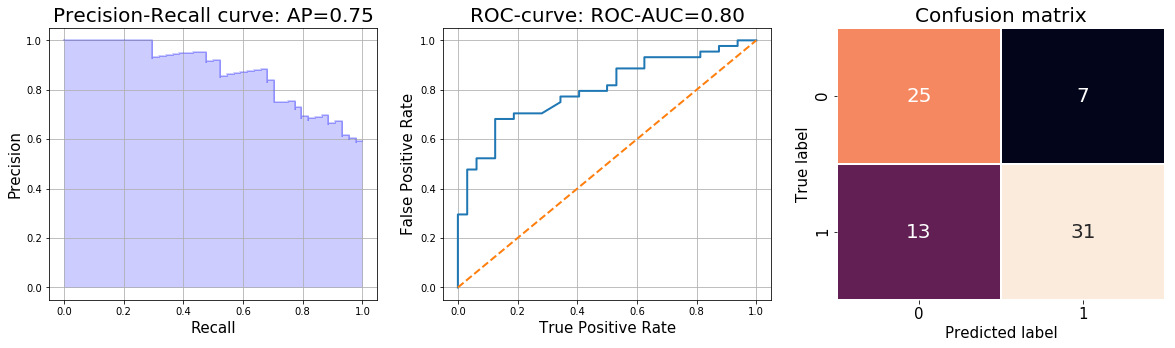

Metrics for SVC with SelectPercentile dimention reduction technique
              precision    recall  f1-score   support

    Glaucoma       0.00      0.00      0.00        32
     Control       0.58      1.00      0.73        44

   micro avg       0.58      0.58      0.58        76
   macro avg       0.29      0.50      0.37        76
weighted avg       0.34      0.58      0.42        76



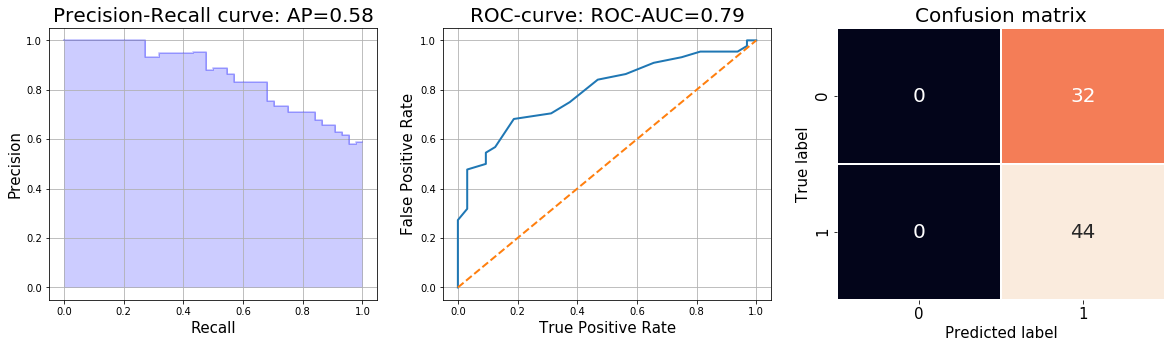

Metrics for SVC with PCA dimention reduction technique
              precision    recall  f1-score   support

    Glaucoma       0.78      0.66      0.71        32
     Control       0.78      0.86      0.82        44

   micro avg       0.78      0.78      0.78        76
   macro avg       0.78      0.76      0.76        76
weighted avg       0.78      0.78      0.77        76



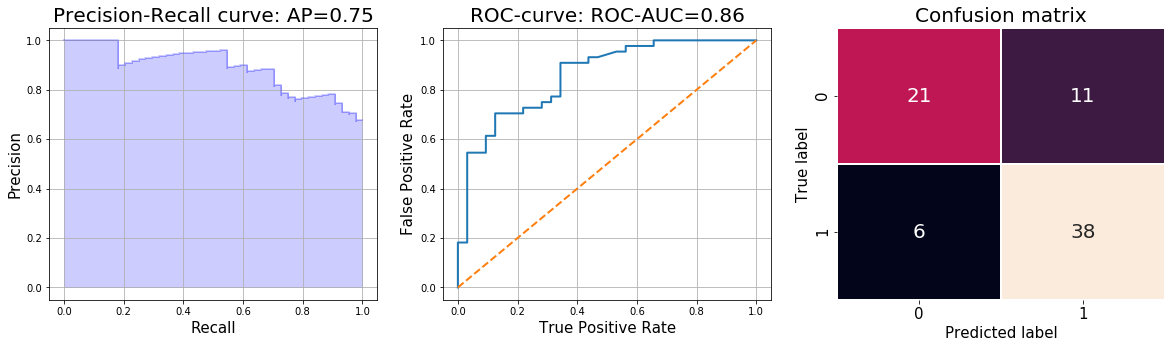

Metrics for SVC with LocallyLinearEmbedding dimention reduction technique
              precision    recall  f1-score   support

    Glaucoma       0.00      0.00      0.00        32
     Control       0.58      1.00      0.73        44

   micro avg       0.58      0.58      0.58        76
   macro avg       0.29      0.50      0.37        76
weighted avg       0.34      0.58      0.42        76



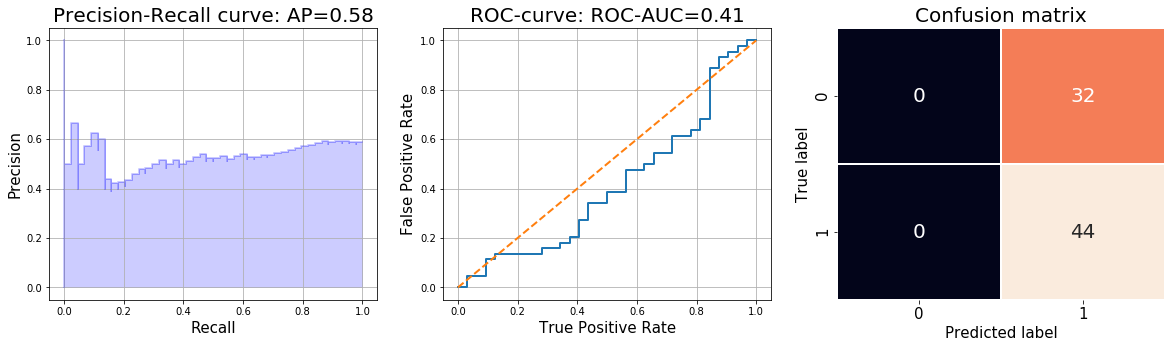

Metrics for KNeighborsClassifier with NoneType dimention reduction technique
              precision    recall  f1-score   support

    Glaucoma       0.50      0.41      0.45        32
     Control       0.62      0.70      0.66        44

   micro avg       0.58      0.58      0.58        76
   macro avg       0.56      0.56      0.55        76
weighted avg       0.57      0.58      0.57        76



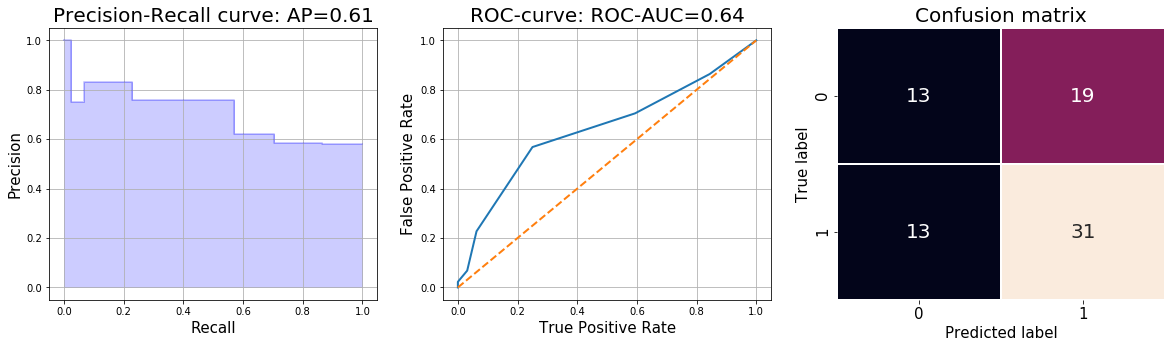

Metrics for KNeighborsClassifier with SelectKBest dimention reduction technique
              precision    recall  f1-score   support

    Glaucoma       0.61      0.69      0.65        32
     Control       0.75      0.68      0.71        44

   micro avg       0.68      0.68      0.68        76
   macro avg       0.68      0.68      0.68        76
weighted avg       0.69      0.68      0.69        76



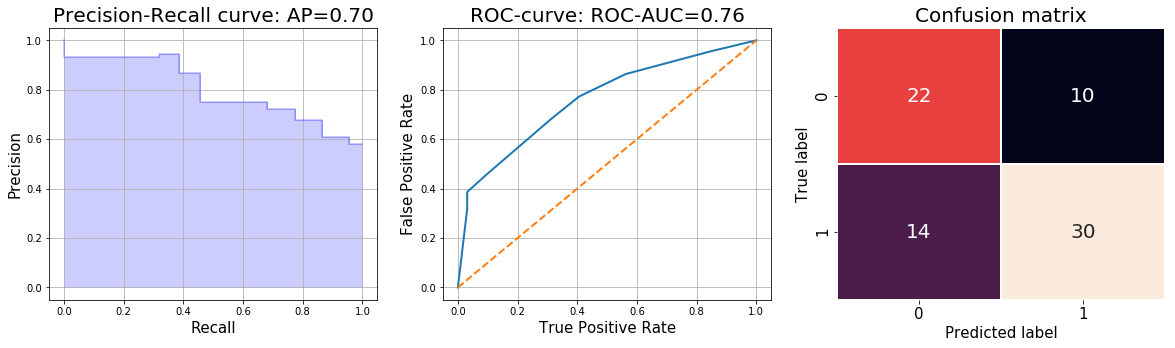

Metrics for KNeighborsClassifier with SelectPercentile dimention reduction technique
              precision    recall  f1-score   support

    Glaucoma       0.64      0.84      0.73        32
     Control       0.85      0.66      0.74        44

   micro avg       0.74      0.74      0.74        76
   macro avg       0.75      0.75      0.74        76
weighted avg       0.76      0.74      0.74        76



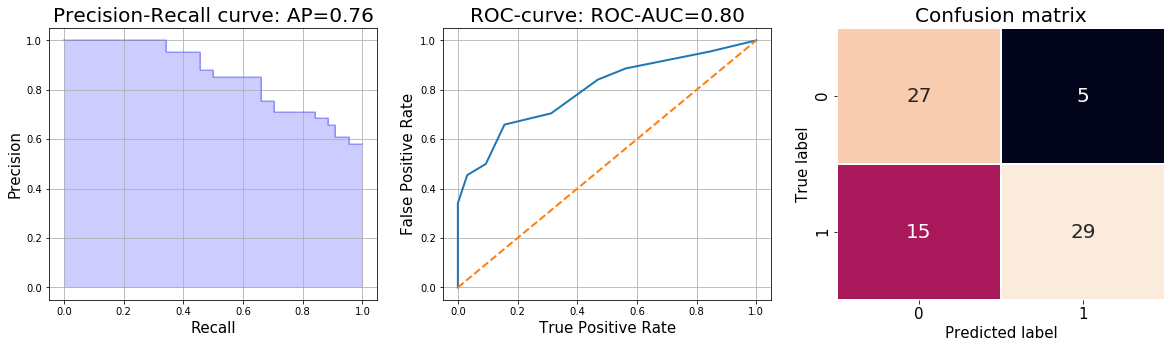

Metrics for KNeighborsClassifier with PCA dimention reduction technique
              precision    recall  f1-score   support

    Glaucoma       0.61      0.34      0.44        32
     Control       0.64      0.84      0.73        44

   micro avg       0.63      0.63      0.63        76
   macro avg       0.62      0.59      0.58        76
weighted avg       0.63      0.63      0.61        76



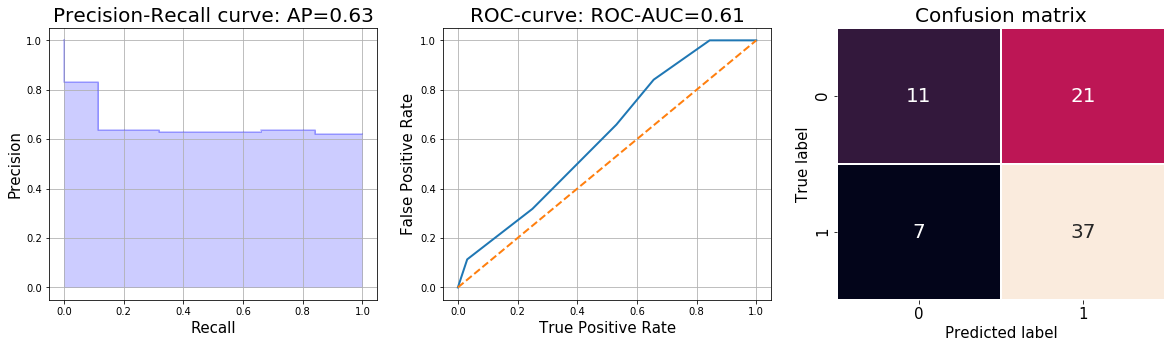

Metrics for KNeighborsClassifier with LocallyLinearEmbedding dimention reduction technique
              precision    recall  f1-score   support

    Glaucoma       1.00      0.94      0.97        32
     Control       0.96      1.00      0.98        44

   micro avg       0.97      0.97      0.97        76
   macro avg       0.98      0.97      0.97        76
weighted avg       0.97      0.97      0.97        76



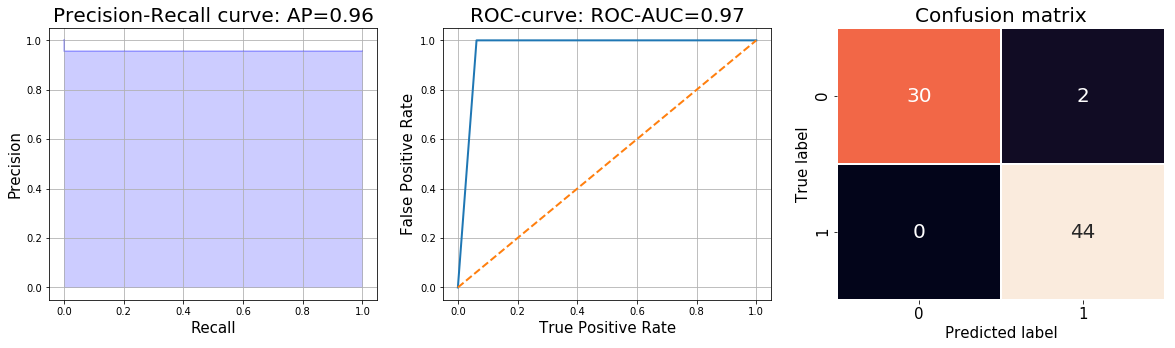

Metrics for LogisticRegression with NoneType dimention reduction technique
              precision    recall  f1-score   support

    Glaucoma       0.75      0.75      0.75        32
     Control       0.82      0.82      0.82        44

   micro avg       0.79      0.79      0.79        76
   macro avg       0.78      0.78      0.78        76
weighted avg       0.79      0.79      0.79        76



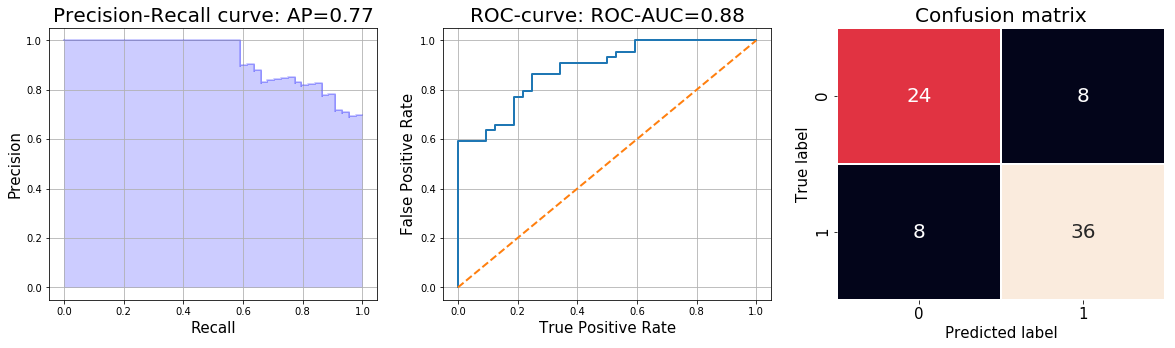

Metrics for LogisticRegression with SelectKBest dimention reduction technique
              precision    recall  f1-score   support

    Glaucoma       0.65      0.62      0.63        32
     Control       0.73      0.75      0.74        44

   micro avg       0.70      0.70      0.70        76
   macro avg       0.69      0.69      0.69        76
weighted avg       0.70      0.70      0.70        76



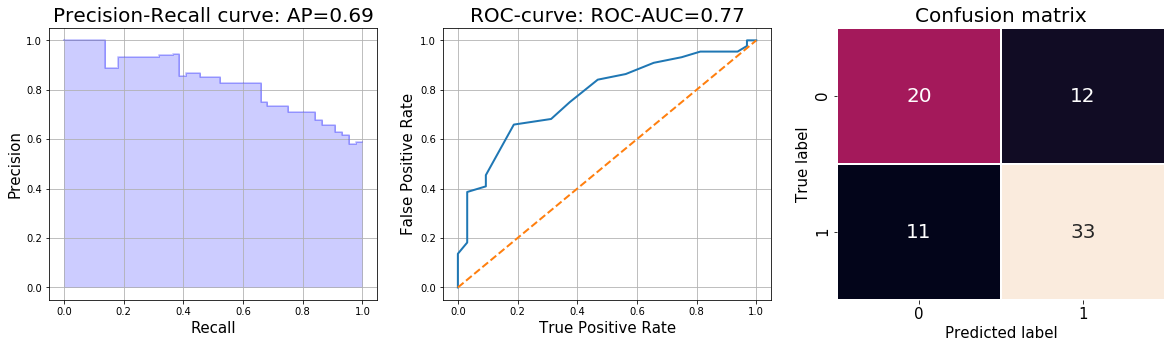

Metrics for LogisticRegression with SelectPercentile dimention reduction technique
              precision    recall  f1-score   support

    Glaucoma       0.63      0.69      0.66        32
     Control       0.76      0.70      0.73        44

   micro avg       0.70      0.70      0.70        76
   macro avg       0.69      0.70      0.69        76
weighted avg       0.70      0.70      0.70        76



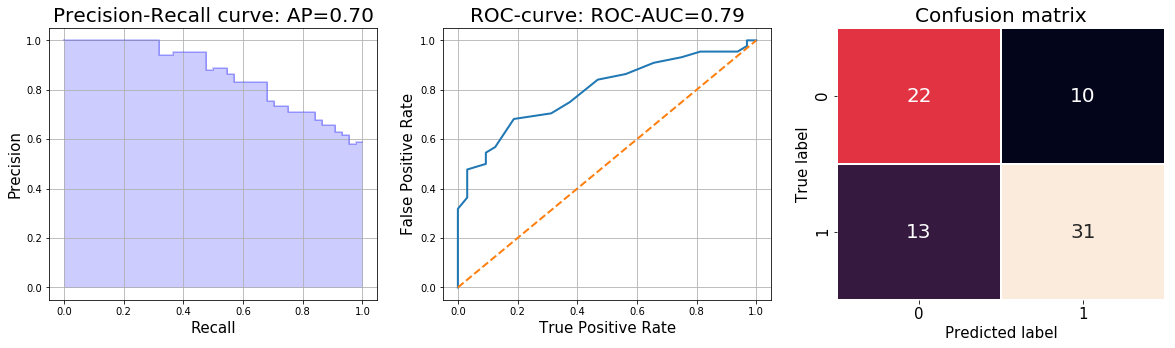

Metrics for LogisticRegression with PCA dimention reduction technique
              precision    recall  f1-score   support

    Glaucoma       0.75      0.75      0.75        32
     Control       0.82      0.82      0.82        44

   micro avg       0.79      0.79      0.79        76
   macro avg       0.78      0.78      0.78        76
weighted avg       0.79      0.79      0.79        76



KeyboardInterrupt: 

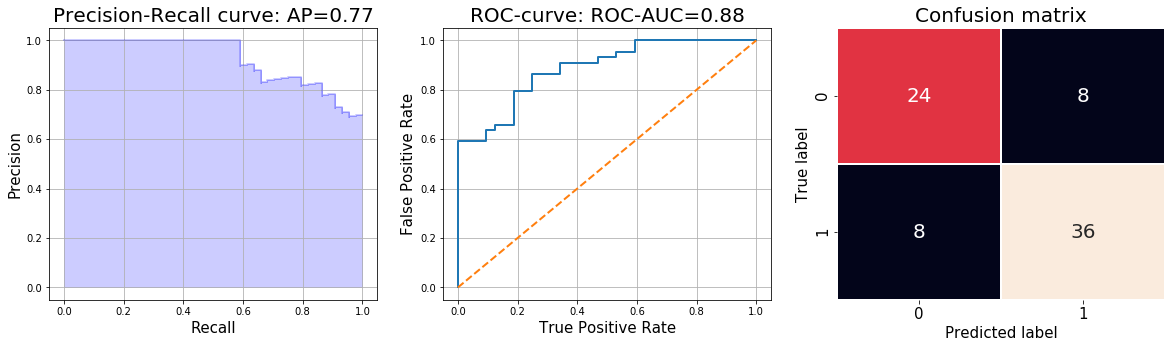

In [19]:
import warnings
warnings.simplefilter("ignore")
estimator_median, params_median, models_median, std_median, cv_median = MyGridSearchClf(data_median, y, 'roc_auc', n_features, n_components)
estimator_median

In [13]:
std_median

,None,SelectKBest(f_classif),SelectPercentile(f_classif),PCA,LLE
RFC,0.044410,0.053890,0.061500,0.060728,0.105057
SVC,0.037920,0.002539,0.002557,0.037920,0.070232
KNC,0.116248,0.029476,0.019735,0.106340,0.005156
LR,0.042891,0.010715,0.002557,0.056374,0.102029
XGB,0.067000,0.027658,0.011671,0.057747,0.099531
NB,0.134751,0.014035,0.004572,0.138482,0.082749


In [10]:
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_curve, f1_score
from sklearn.metrics import recall_score,precision_score, roc_auc_score, roc_curve, average_precision_score
from IPython.display import display

In [11]:
# some comments y_true = Target, y_pred = clf.predict(X_test), y_prob = clf.predict_proba(X_test)[:,1]
# filename - name of saved pick, i.e string-like 'Burnaev_nude.png' 

In [23]:
def result_report(y_true, y_pred, y_prob, filename): 
        
    #main metrics
    print(classification_report(y_true, y_pred, target_names=['Glaucoma', 'Control']))
    aps = average_precision_score(y_true, y_pred) 
    ras = roc_auc_score(y_true, y_prob)
    fig = plt.figure(figsize = (20,5))
    
    #precision recall curve
    plt.subplot(1,3,1)
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    plt.step(recall, precision, color='b', alpha=0.2,where='post', lw = 2)
    plt.fill_between(recall, precision, step='post', alpha=0.2,color='b')
    plt.xlabel('Recall',fontsize = 15)
    plt.ylabel('Precision',fontsize = 15)
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.grid(True)
    plt.title('Precision-Recall curve: AP={0:0.2f}'.format(aps),fontsize = 20)
    
    #roc auc
    plt.subplot(1,3,2)
    plt.title('ROC-curve: ROC-AUC={0:0.2f}'.format(ras),fontsize = 20)
    plt.xlabel('True Positive Rate',fontsize = 15)
    plt.ylabel('False Positive Rate',fontsize = 15)
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.plot(fpr, tpr, lw = 2)
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.grid(True)
    plt.plot([0, 1], [0, 1], linestyle='--', lw = 2)
    
    #confusion matrix
    plt.subplot(1,3,3)
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cbar=False, linewidths=.5, annot_kws={"size": 20})
    plt.title('Confusion matrix',fontsize = 20)
    plt.ylabel('True label',fontsize = 15)
    plt.xlabel('Predicted label',fontsize = 15)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.savefig(filename, bbox_inches='tight', dpi =200)
    plt.show()
    
    return classification_report(y_true, y_pred, target_names=['Glaucoma', 'Control'],output_dict=True)

#using prefitted clf!
def roc_concat(clf_list, y_true):
    plt.figure(figsize = (7,7))
    for clf in clf_list:
        y_pred = clf.predict(X)
        y_prob = clf.predict_proba(X)[:,1]
        fpr, tpr, _ = roc_curve(y_true, y_prob)
        plt.plot(fpr, tpr, label = '{}'.format(clf.__class__.__name__), lw = 2)
    plt.plot([0, 1], [0, 1], linestyle='--', lw =2 , color = 'black')
    plt.title('ROC-curve',fontsize = 20)
    plt.xlabel('True Positive Rate',fontsize = 15)
    plt.ylabel('False Positive Rate',fontsize = 15)
    plt.legend(prop={'size': 12})
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.grid(True)
    plt.savefig('ROC-curve_all.png', bbox_inches='tight', dpi =200)
    plt.show()
        
        

In [24]:
#y_true = np.array([1, 0, 1, 0, 1])
#y_pred = np.array([1, 0, 1, 1, 1])
##y_prob = np.array([0.1, 0.1, 0.15, 0.6, 0.1])
#result_report(y_true, y_pred, y_prob, 'send_nudes.png')

In [78]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
X,y = X[:100], y[:100]
clf_list = [LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X, y), xgboost.XGBClassifier().fit(X,y)] 

roc_concat(clf_list,y)

NameError: name 'roc_concat' is not defined